In [38]:
# 1. Cargue en un Dataframe los datos de los accidentes de los últimos 3 años.

In [39]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste de estilo para gráficos
sns.set(style="whitegrid")

# Paso 1: Cargar los datos de los últimos 3 años
atus2021 = pd.read_csv("atus_anual_csv/conjunto_de_datos/atus_anual_2021.csv", index_col=False)
atus2022 = pd.read_csv("atus_anual_csv/conjunto_de_datos/atus_anual_2022.csv", index_col=False)
atus2023 = pd.read_csv("atus_anual_csv/conjunto_de_datos/atus_anual_2023.csv", index_col=False)
pd.set_option('display.max_columns', None)


# Concatenar los DataFrames de los tres años en uno solo
data = pd.concat([atus2021, atus2022, atus2023], ignore_index=True)
print("Paso 1 Cargue en un Dataframe los datos de los accidentes de los últimos 3 años")
data

Paso 1 Cargue en un Dataframe los datos de los accidentes de los últimos 3 años


,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
3,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
4,Municipal,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1145649,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1145650,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1145651,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [40]:
# Paso 2: Crear la columna de fecha
# Asegurarse de que las columnas relevantes son numéricas y no tienen valores nulos
data['date'] = data.apply(lambda row: f"{row['ANIO']}-{str(row['MES']).zfill(2)}-{str(row['ID_DIA']).zfill(2)} {str(row['ID_HORA']).zfill(2)}:{str(row['ID_MINUTO']).zfill(2)}", axis=1)
data.insert(3, 'date', data.pop('date'))

data

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,date,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1145649,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1145650,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1145651,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [41]:

# Paso 3: Crear las columnas "Área" y "Zona"
data['Area'] = data.apply(lambda row: 'Urbana' if row['URBANA'] == 1 else 'Suburbana', axis=1)
print("Paso 3 Crear las columnas 'Área' y 'Zona'")
print(data['Area'].head())


Paso 3 Crear las columnas 'Área' y 'Zona'
0    Suburbana
1    Suburbana
2    Suburbana
3    Suburbana
4    Suburbana
Name: Area, dtype: object


In [42]:
# 4. Agregue una columna Zona cuyos valores serán la zona donde ocurrió el accidente.
def asignar_zona(row):
    if row['Area'] == 'SUBURBANA':
        return row['Suburbana']
    elif row['Area'] == 'URBANA':
        return row['Urbana']
    
    
data["ZONA"] = data.apply(asignar_zona, axis=1)
data

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,date,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,Area,ZONA
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Suburbana,None
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Suburbana,None
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,Suburbana,None
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Suburbana,None
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,Suburbana,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Suburbana,None
1145649,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Suburbana,None
1145650,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Suburbana,None
1145651,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Suburbana,None


In [43]:

#Paso 5
# Eliminar las columnas "URBANA" y "SUBURBANA"
data.drop(columns=['URBANA', 'SUBURBANA'], inplace=True, errors='ignore')
print("Paso 5 Eliminar las columnas 'URBANA' y 'SUBURBANA'")
data

Paso 5 Eliminar las columnas 'URBANA' y 'SUBURBANA'


,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,date,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,Area,ZONA
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Suburbana,None
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Suburbana,None
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,Suburbana,None
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Suburbana,None
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,Suburbana,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Suburbana,None
1145649,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Suburbana,None
1145650,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Suburbana,None
1145651,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Suburbana,None


In [44]:
# Paso 6 Municipio con más meses sin accidente
print("Paso 6 Municipio con más meses sin accidentes")

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M', errors='coerce')

data['Mes'] = data['date'].dt.month
no_accidentes_por_mes = data.groupby(['ID_ENTIDAD', 'ID_MUNICIPIO', 'Mes']).size().reset_index(name='accidentes')
meses_sin_accidentes = no_accidentes_por_mes[no_accidentes_por_mes['accidentes'] == 0]

if not meses_sin_accidentes.empty:
    mas_meses_sin_accidentes = meses_sin_accidentes.groupby(['ID_ENTIDAD', 'ID_MUNICIPIO']).size().idxmax()
    print(mas_meses_sin_accidentes)
else:
    mas_meses_sin_accidentes = None
    print("No hay municipios con meses sin accidentes.")

#drop the column data['Mes']
data.drop(columns=['Mes'], inplace=True, errors='ignore')

Paso 6 Municipio con más meses sin accidentes
No hay municipios con meses sin accidentes.


In [45]:
accidentes_2023_2 = data[data["ANIO"] == 2023]
accidentes_2023 = accidentes_2023_2[accidentes_2023_2 ['ESTATUS'] != 'Certificado Cero']
resumen_accidentes = accidentes_2023.groupby('TIPACCID').size().reset_index(name='CANTIDAD')
total_accidentes = resumen_accidentes['CANTIDAD'].sum()
resumen_accidentes['PORCENTAJE'] = (resumen_accidentes['CANTIDAD'] / total_accidentes) * 100
resumen_accidentes


,TIPACCID,CANTIDAD,PORCENTAJE
0,Caída de pasajero,1947,0.490888
1,Certificado cero,15580,3.928114
2,Colisión con animal,1026,0.258681
3,Colisión con ciclista,3928,0.990349
4,Colisión con ferrocarril,264,0.066561
5,Colisión con motocicleta,57421,14.477294
6,Colisión con objeto fijo,44233,11.152264
7,Colisión con peatón (atropellamiento),11853,2.988443
8,Colisión con vehículo automotor,232509,58.621429
9,Incendio,381,0.096060


In [46]:
print("Paso 8 :Obtenga la cantidad de muertos y lesionados de los últimos 3 años")
total_muertos = data['CONDMUERTO'].sum() + data['PASAMUERTO'].sum() + data['PEATMUERTO'].sum() + data['CICLMUERTO'].sum()
total_lesionados = data['CONDHERIDO'].sum() + data['PASAHERIDO'].sum() + data['PEATHERIDO'].sum() + data['CICLHERIDO'].sum()
print(f"Total de muertos en los últimos 3 años: {total_muertos}" , f"Total de lesionados en los últimos 3 años: {total_lesionados}")


Paso 8 :Obtenga la cantidad de muertos y lesionados de los últimos 3 años
Total de muertos en los últimos 3 años: 14244 Total de lesionados en los últimos 3 años: 263560


In [47]:

# Paso 9: Comparación de accidentes año contra año
print("Paso 9 Comparación de accidentes año contra año")

accidentes_2021_2 = data[data["ANIO"] == 2021]
accidentes_2021 = accidentes_2021_2[accidentes_2021_2 ['ESTATUS'] != 'Certificado Cero']
numAccidentes_2021 = accidentes_2021.shape[0]

accidentes_2022_2 = data[data["ANIO"] == 2022]
accidentes_2022 = accidentes_2022_2[accidentes_2022_2 ['ESTATUS'] != 'Certificado Cero']
numAccidentes_2022 = accidentes_2022.shape[0]

accidentes_2023_2 = data[data["ANIO"] == 2023]
accidentes_2023 = accidentes_2023_2[accidentes_2023_2 ['ESTATUS'] != 'Certificado Cero']
numAccidentes_2023 = accidentes_2023.shape[0]

variacion_2022 = ((numAccidentes_2022 - numAccidentes_2021) / numAccidentes_2021) * 100
variacion_2023 = ((numAccidentes_2023 - numAccidentes_2022) / numAccidentes_2022) * 100

print("Cantidad de accidentes en 2021: " + str(numAccidentes_2021))
print("Cantidad de accidentes en 2022: " + str(numAccidentes_2022) + " (Variación: {:.2f}%)".format(variacion_2022))
print("Cantidad de accidentes en 2023: " + str(numAccidentes_2023) + " (Variación: {:.2f}%)".format(variacion_2023))

Paso 9 Comparación de accidentes año contra año
Cantidad de accidentes en 2021: 356315
Cantidad de accidentes en 2022: 392710 (Variación: 10.21%)
Cantidad de accidentes en 2023: 396628 (Variación: 1.00%)


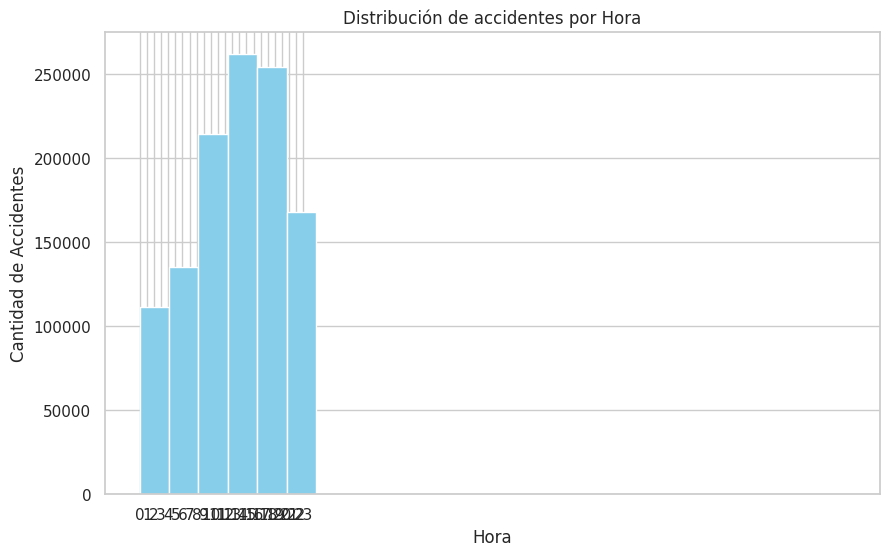

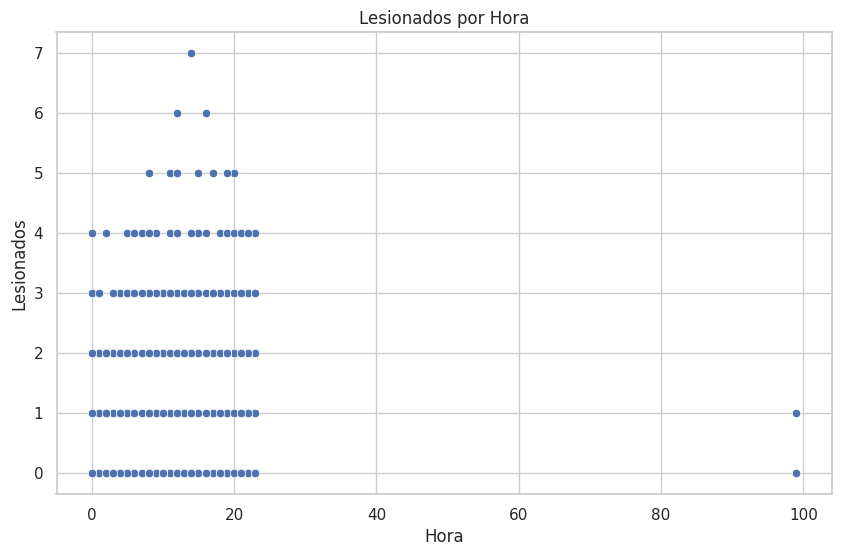

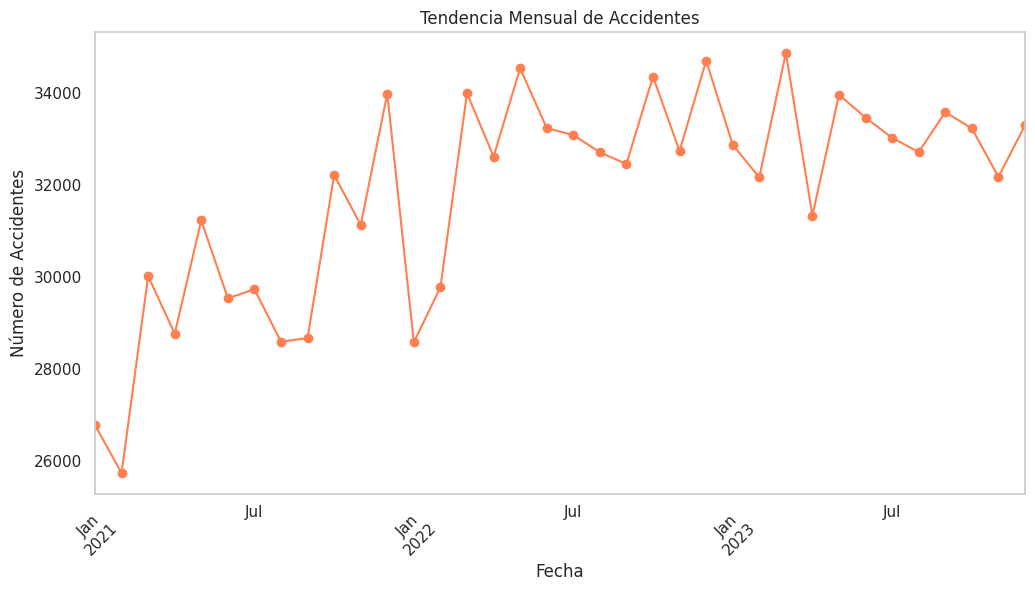

In [ ]:

#Paso 10 Graficos
#Seleccione una o dos características y haga una gráfica de cada una de las siguientes: 



#histograma
plt.figure(figsize=(10, 6))
plt.hist(data['ID_HORA'], bins=24, color='skyblue')
plt.title('Distribución de accidentes por Hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(range(0, 24))
plt.show()

# Paso 10: Gráfico de Dispersión (Ejemplo: ID_HORA vs. lesionados)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ID_HORA', y='CONDHERIDO', data=data)
plt.title('Lesionados por Hora')
plt.xlabel('Hora')
plt.ylabel('Lesionados')
plt.show()

# Paso 10: Gráfico de Líneas (Evolución mensual de accidentes)
data['Fecha_Mensual'] = data['date'].dt.to_period('M')
accidentes_mensuales = data.groupby('Fecha_Mensual').size()

# Verificar si hay datos para graficar
if not accidentes_mensuales.empty:
    plt.figure(figsize=(12, 6))
    accidentes_mensuales.plot(kind='line', marker='o', color='coral')
    plt.title('Tendencia Mensual de Accidentes')
    plt.xlabel('Fecha')
    plt.ylabel('Número de Accidentes')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
    plt.grid()  # Agregar una cuadrícula para facilitar la lectura
    plt.show()
else:
    print("No hay datos para graficar la tendencia mensual de accidentes.")


In [49]:
ultimo_anio = data[data['ANIO'] == 2023]  # Cambia el año si es necesario

# Paso 2: Resumir accidentes por tipo
resumen_accidentes = ultimo_anio['TIPACCID'].value_counts(normalize=True) * 100

# Paso 3: Convertir a DataFrame para mejor visualización
resumen_df = resumen_accidentes.reset_index()
resumen_df.columns = ['Tipo de Accidente', 'Porcentaje']

# Paso 4: Mostrar resultados
print("Resumen de accidentes del último año por tipo:")
print(resumen_df)
total_muertos = data['CONDMUERTO'].sum()  # Asumiendo que 'CONDMUERTO' es la columna de muertos
total_lesionados = data['CONDHERIDO'].sum()  # Asumiendo que 'CONDHERIDO' es la columna de lesionados

print(f'Total de muertos en los últimos 3 años: {total_muertos}')
print(f'Total de lesionados en los últimos 3 años: {total_lesionados}')

# Paso 2: Comparación de accidentes año contra año
accidentes_por_anio = data.groupby('ANIO').size()

# Calcular variación anual
variacion_anual = accidentes_por_anio.pct_change() * 100

# Mostrar resultados
comparacion = pd.DataFrame({
    'Accidentes': accidentes_por_anio,
    'Variación (%)': variacion_anual
})

print("\nComparación de accidentes por año:")
print(comparacion)


Resumen de accidentes del último año por tipo:
                        Tipo de Accidente  Porcentaje
0         Colisión con vehículo automotor   58.621429
1                Colisión con motocicleta   14.477294
2                Colisión con objeto fijo   11.152264
3                        Certificado cero    3.928114
4   Colisión con peatón (atropellamiento)    2.988443
5                               Volcadura    2.886584
6                       Salida del camino    2.579747
7                                    Otro    1.463588
8                   Colisión con ciclista    0.990349
9                       Caída de pasajero    0.490888
10                    Colisión con animal    0.258681
11                               Incendio    0.096060
12               Colisión con ferrocarril    0.066561
Total de muertos en los últimos 3 años: 7726
Total de lesionados en los últimos 3 años: 137857

Comparación de accidentes por año:
      Accidentes  Variación (%)
ANIO                           
20